In [13]:
import astropy
import math
import os
import numpy as np
import scipy as sp
from scipy.interpolate import make_interp_spline
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

In [14]:
def extract_hdul(filelist):
    if type(filelist) != list:
        filelist = [filelist]
    output_hdul = []
    for filename in filelist:
        output_hdul.append(fits.open(filename))
    if len(output_hdul) == 1:
        output_hdul = output_hdul[0]
    return output_hdul        

In [15]:
def print_frame(hdul):
    if type(hdul) == list:
        raise ValueError("Input must be a single frame hdul.")
    if type(hdul) == astropy.io.fits.hdu.hdulist.HDUList:
        frame = hdul[0].data
    frame = hdul
    while len(frame.shape) >= 3:
        frame = frame.sum(axis=0)
    plt.imshow(frame, aspect='auto')

In [16]:
def plot_wavelength(hdul,X,delta_X,Y,delta_Y,smooth):
    #END_SEPARATION = -1
    #DOUBLE_MEDIAN = 1
    #MULT_MEDIAN = 3
    if type(hdul) == list:
        raise ValueError("Input must be a single frame hdul.")
    if type(hdul) == astropy.io.fits.hdu.hdulist.HDUList:
        frame = hdul[0].data    
        lambda_min = hdul[0].header['CRVAL3']
        lambda_step = hdul[0].header['CRPIX3']
    else:
        frame = hdul
        lambda_min = 3227
        lambda_step = 1
    target = frame[:,Y-delta_Y:Y+delta_Y,X-delta_X:X+delta_X]
    X = np.array(range(int(lambda_min),int(lambda_min+lambda_step*target.shape[0])))
    Y = target.sum(axis=(1,2))
    if smooth:
        Xnew = np.linspace(X.min(), X.max(), 400)  
        Ynew = make_interp_spline(X, Y)(Xnew)
        [X, Y] = [Xnew, Ynew]
    plt.plot(X,Y)
    plt.xlabel('Wavelength (Å)')
    plt.ylabel('Flux')
    #plt.plot(X[:END_SEPARATION],Y[:END_SEPARATION])
    #if DOUBLE_MEDIAN:
    #    plt.ylim([-100,np.median(Y)*MULT_MEDIAN])
    return

In [17]:
def stack_frames(hduls, method):
    if type(hduls) != list:
        hduls = [hduls]
    if method == 'sum':
        output_data_cube = np.zeros_like(hduls[0][0].data)
        for hdul in hduls:
            output_data_cube += hdul[0].data
    if method == 'median':
        output_data_cube = np.median(np.array([x[0].data for x in hduls]), axis = 0)
    return output_data_cube

In [26]:
filenames_wo_sky = ['C:/DIEGO/KCWI/files_all/redux/kb200915_00045_icubed.fits',
             'C:/DIEGO/KCWI/files_all/redux/kb200915_00046_icubed.fits',
             'C:/DIEGO/KCWI/files_all/redux/kb200915_00047_icubed.fits',
             'C:/DIEGO/KCWI/files_all/redux/kb200915_00048_icubed.fits']
filenames_w_sky = ['C:/DIEGO/KCWI/20220225_separate_sky_frame/redux/kb200915_00045_icubed.fits',
                   'C:/DIEGO/KCWI/20220225_separate_sky_frame/redux/kb200915_00046_icubed.fits',
                   'C:/DIEGO/KCWI/20220225_separate_sky_frame/redux/kb200915_00047_icubed.fits']
#filenames_w_sky_2 = ['C:/DIEGO/KCWI/20220303_separate_sky_frame/redux/kb200915_00045_icubed.fits',
#                   'C:/DIEGO/KCWI/20220303_separate_sky_frame/redux/kb200915_00046_icubed.fits',
#                   'C:/DIEGO/KCWI/20220303_separate_sky_frame/redux/kb200915_00047_icubed.fits']                   
hduls_wo_sky = extract_hdul(filenames_wo_sky)
hduls_w_sky = extract_hdul(filenames_w_sky)
#hduls_w_sky_2 = extract_hdul(filenames_w_sky_2)
sky_files = ['C:/DIEGO/KCWI/20220225_separate_sky_frame/redux/kb200915_00045_sky.fits',
            'C:/DIEGO/KCWI/files_all/redux/kb200915_00045_sky.fits']
hduls_sky = extract_hdul(sky_files)

(-100.0, 40000.0)

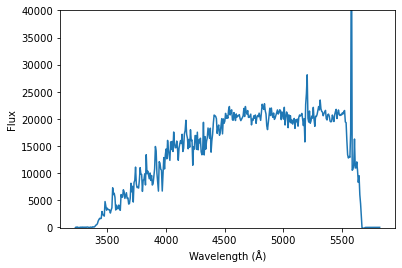

In [19]:
plot_wavelength(stack_frames(hduls_w_sky[:-1], method='sum'),15,5,40,10,True)
plt.ylim([-100,40000])

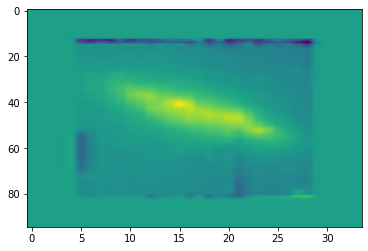

In [20]:
print_frame(stack_frames(hduls_w_sky_2, method='sum'))

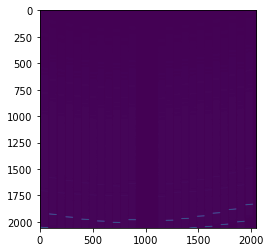

In [39]:
#print_frame(hduls_wo_sky[0][0].data)
#type(hduls_w_sky_2[0][0])
plt.imshow(hduls_sky[1][0].data)

In [36]:
hduls_sky[0][0].data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])